In [1]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import sys
sys.path.insert(1, '../../SyMBac/')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import scienceplots
from seaborn import move_legend
from copy import deepcopy
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True
def bin_data_range(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in ([f"[{int(x.left+1)}, {int(x.right+1)})"  for x in pd.cut(df[column], bins=bins).unique()]) ])


def bin_data_mid(bins, column, df, new_column_name):
    return pd.cut(df[column], bins=bins, labels=[i for i in sorted([x.mid  for x in pd.cut(df[column], bins=bins).unique()]) ])


data = pd.read_pickle("../../microcolony_analysis/real_data_segmentation_notebooks/agar_pad_with_deconv.pickle")
data["Distance from centre of colony"] = np.sqrt(
    (data["Cell y"] - data["Colony centroid y"])**2 + (data["Cell x"] - data["Colony centroid x"])**2 
)
data["Normalised distance from centre of colony"] = data["Distance from centre of colony"] / (data["Colony diameter"]/2)
data["Mean true intensity"] = data["True intensity"] / data["Area"]
data["Mean observed intensity"] = data["Observed intensity"] / data["Area"]

data["Mean deconvolved intensity"] = data["Deconvolved intensity"] / data["Area"]

data = data[(data["Mean true intensity"] > 0)]
data["Colony N cells (binned)"] = bin_data_range(bins = 3, df=data, column="Colony N cells", new_column_name="Colony N cells (binned)")
data["Normalised distance from centre of colony (binned)"] = bin_data_mid(bins=19, df = data, column = "Normalised distance from centre of colony", new_column_name=None)
colony_plot_data = pd.read_pickle("../../microcolony_analysis_giant_lorentz/cell_data_giant_lorentz.pickle")#pd.read_pickle("../../microcolony_analysis/microcolony_plotting_data.pickle")

colony_plot_data["Intensity foldchange"] = colony_plot_data["Mean observed intensity"]/colony_plot_data.query("`Colony N cells` == 1")["Mean observed intensity"].mean()

In [2]:
colony_plot_data["NA"].unique()

array(['Empirical 1.49'], dtype=object)

In [8]:
microcolony.shape

(183, 2, 2304, 2304)

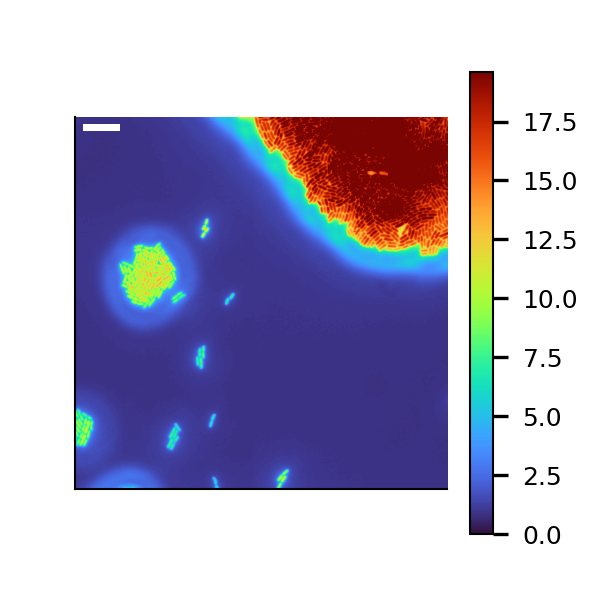

In [39]:
import nd2
microcolony = nd2.imread("../../microcolony_analysis/real_data/agar_pads/100x_SB5_dilute002.nd2", xarray=True, dask=True)
microcolony_img = microcolony[3][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("a.svg")


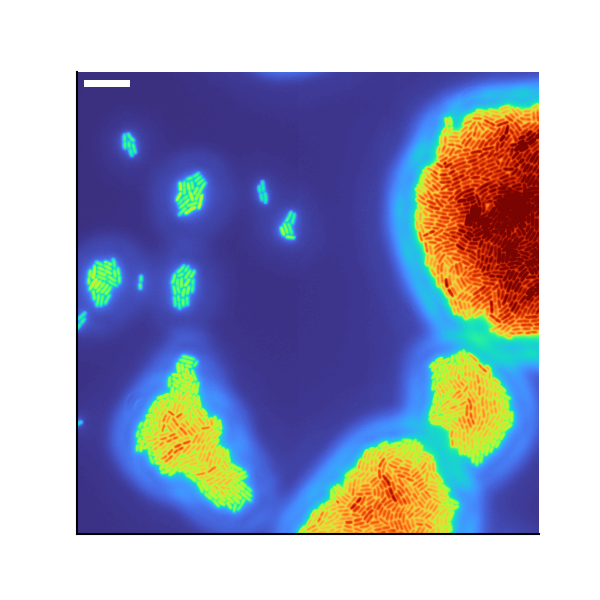

In [38]:
microcolony_img = microcolony[6][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
#fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("c.svg")


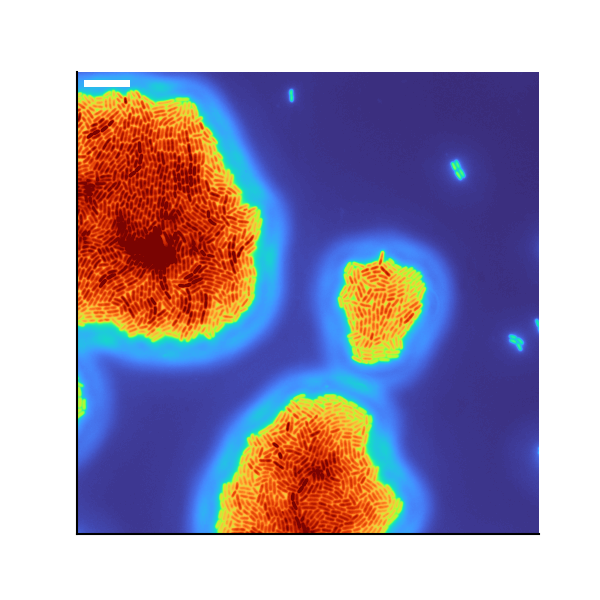

In [16]:
microcolony_img = microcolony[7][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
#fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig(".svg")


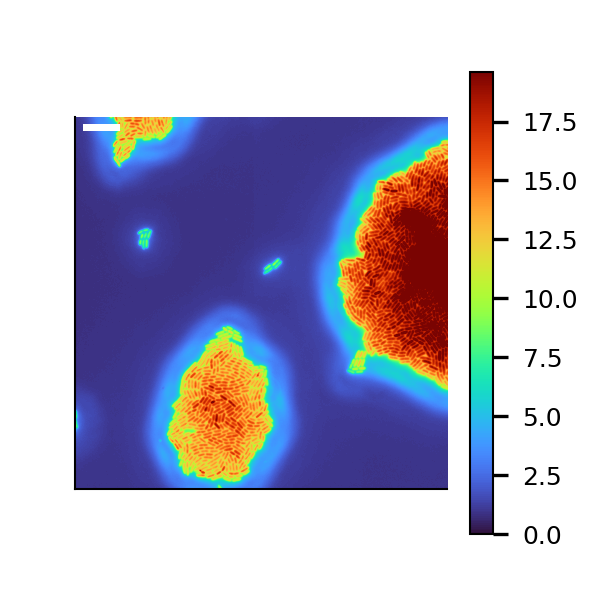

In [40]:
microcolony_img = microcolony[8][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("b.svg")


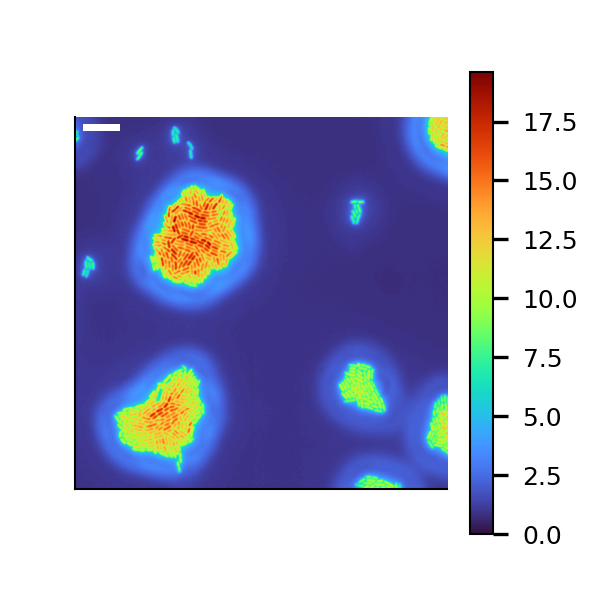

In [41]:
microcolony_img = microcolony[10][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("c.svg")


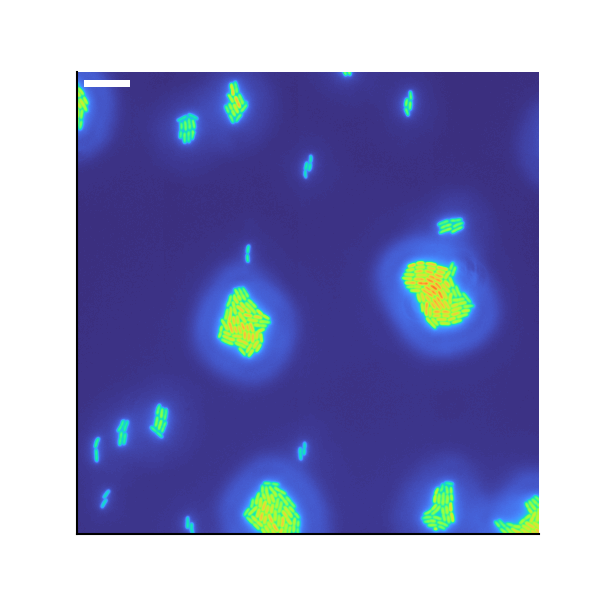

In [27]:
microcolony_img = microcolony[18][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
#fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("c.svg")


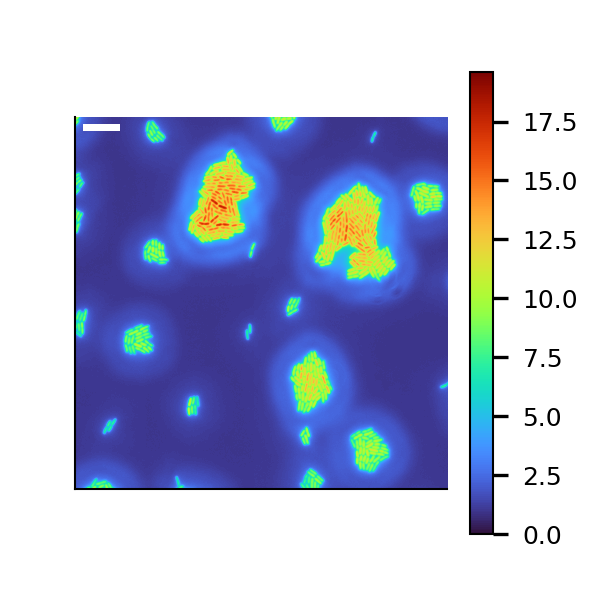

In [42]:
microcolony_img = microcolony[21][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)

fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("d.svg")


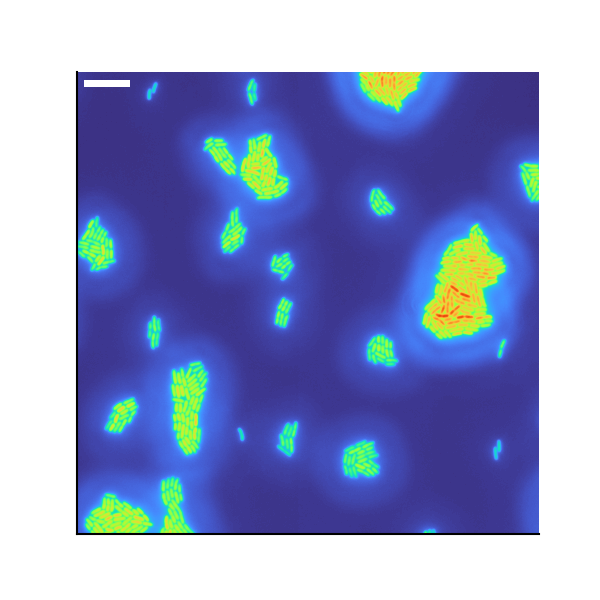

In [31]:
microcolony_img = microcolony[22][1][:,:]

fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

_ = ax.imshow(microcolony_img*0.003, cmap="turbo", vmax = 7000*0.0028, vmin=0)
#fig.colorbar(_, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
scalebar = ScaleBar(0.065/1.5, "um", length_fraction=0.15, scale_loc="none",  location = "upper left", box_alpha=0,  color="white", box_color="k", width_fraction = 0.017)  # 10 micron
ax.add_artist(scalebar)
plt.savefig("c.svg")
